In [44]:
#import EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import Classification models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree, svm

#Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, classification_report

In [2]:
#loading dataset
train_df = pd.read_csv("train.csv")
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
#checking missing values
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [4]:
#checking missing values
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

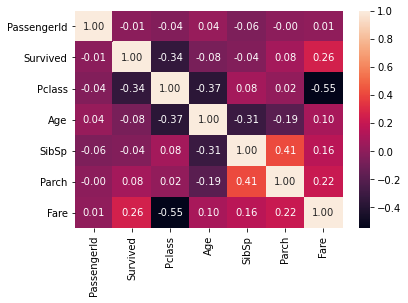

In [5]:
#correlation matrix
sns.heatmap(train_df.corr(),
           annot=True,
           fmt="0.2f");

# Exploratory Data Analysis

### SibSp vs Survived

In [6]:
train_df["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

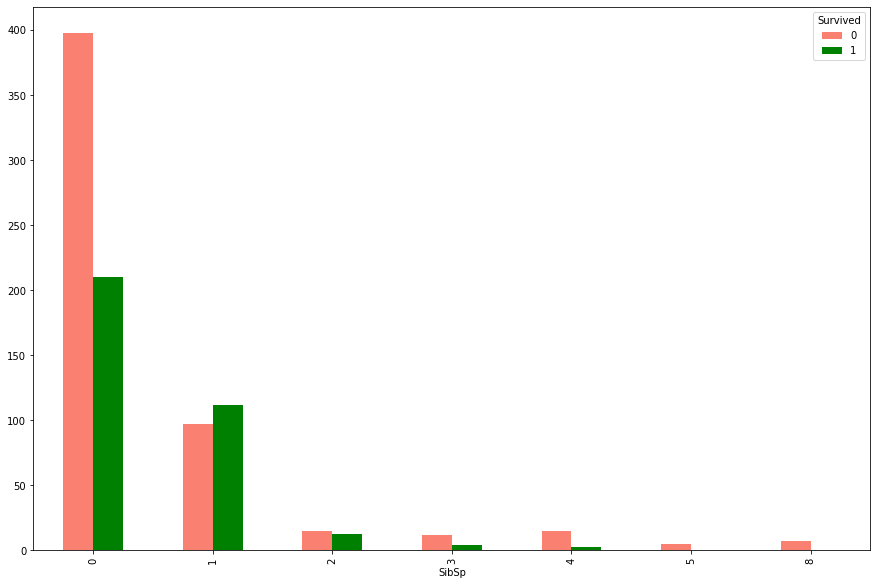

In [7]:
pd.crosstab(train_df["SibSp"],
            train_df["Survived"]).plot(kind="bar",
                                       figsize=(15,10),
                                       color=["salmon","green"]);

* Conclusion : Passengers with 1 or 2 "SibSp" have the most chance of survival
*              The more number of "SibSp", The less chance of survival

### Age vs Survived

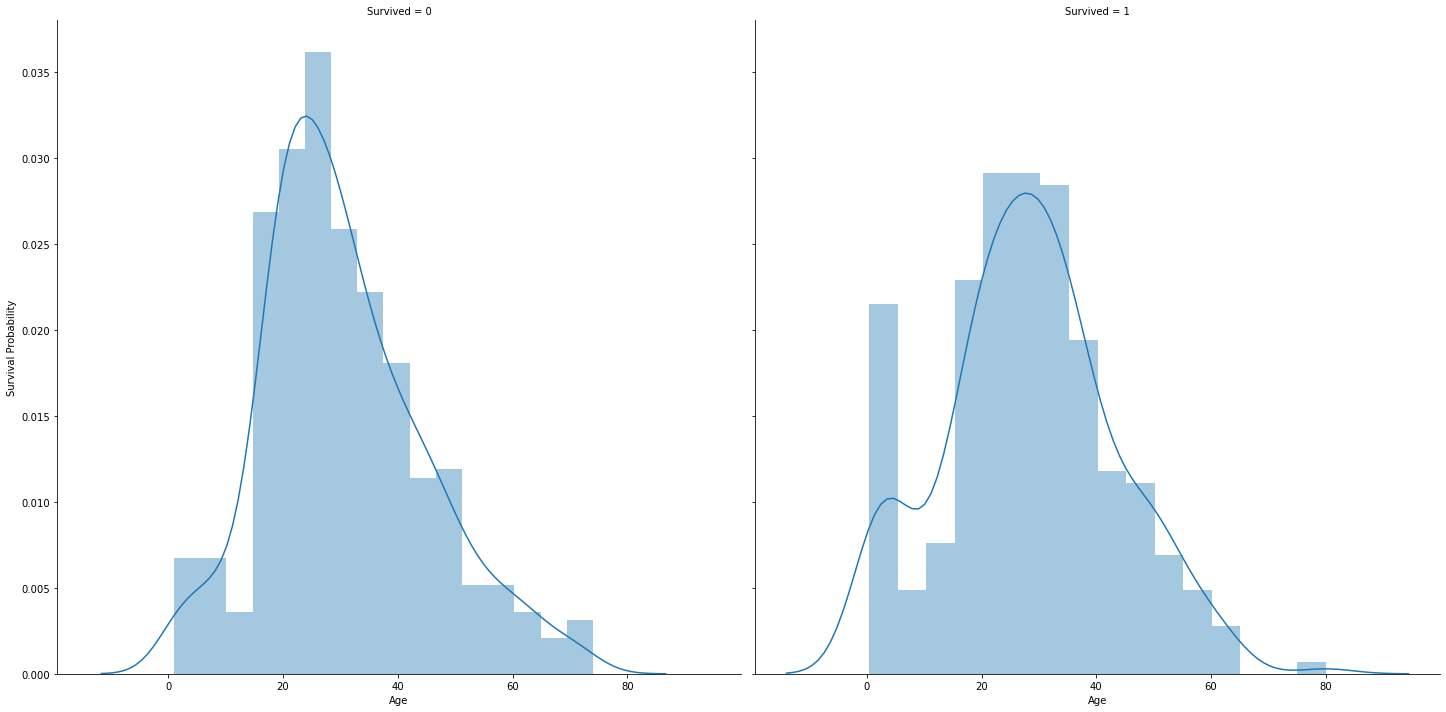

In [8]:
ageplot = sns.FacetGrid(train_df,
                       col="Survived",
                       height=10)
ageplot=ageplot.map(sns.distplot,"Age")
ageplot=ageplot.set_ylabels("Survival Probability")

* Conclusion : The more age, The less chance of survival

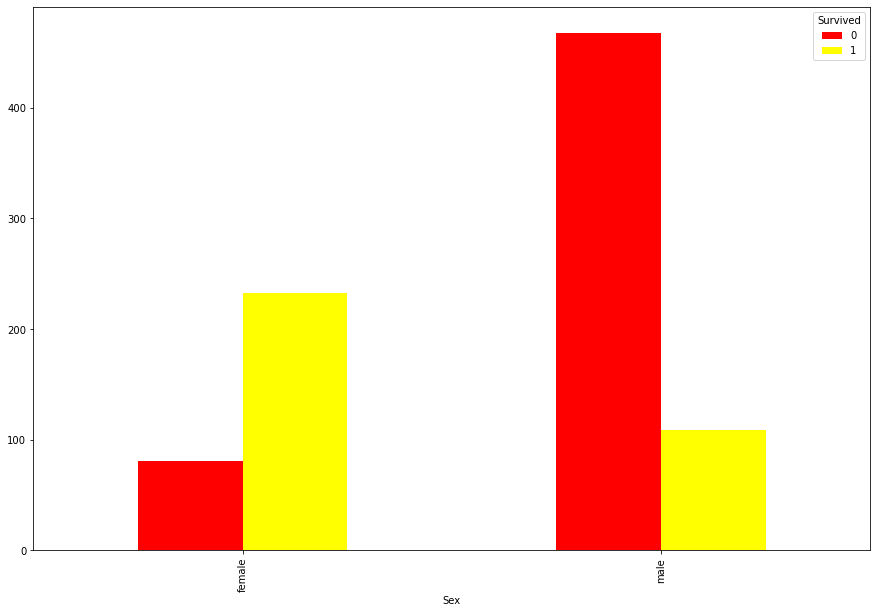

In [9]:
sexplot= pd.crosstab(train_df.Sex,
           train_df.Survived)
sexplot.plot(kind="bar",
            figsize=(15,10),
            color=["red","yellow"]);

* Conclusion : Females have more chance of survival

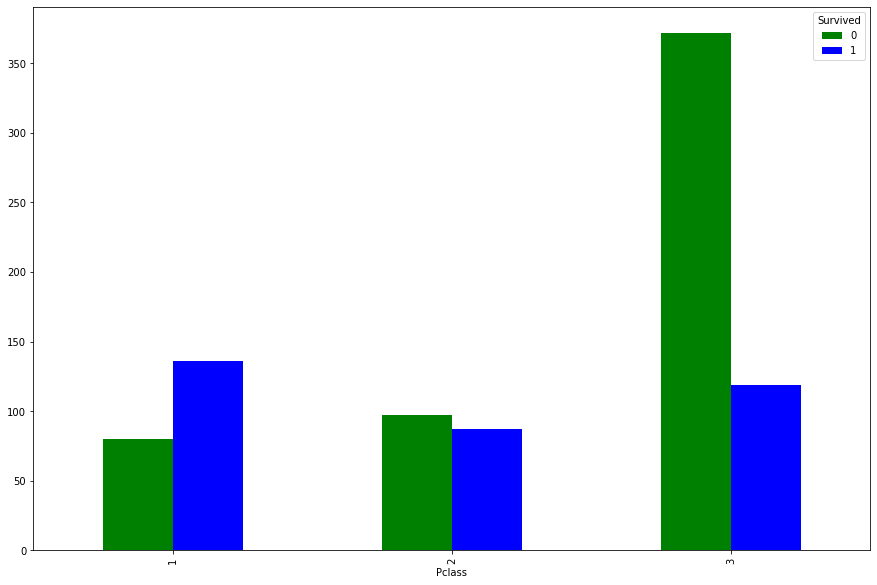

In [10]:
pclassplot=pd.crosstab(train_df.Pclass,
           train_df.Survived)
pclassplot.plot(kind="bar",
                figsize=(15,10),
                color=["green","blue"]);

* Conclusion : The lower class, The more chance of survival

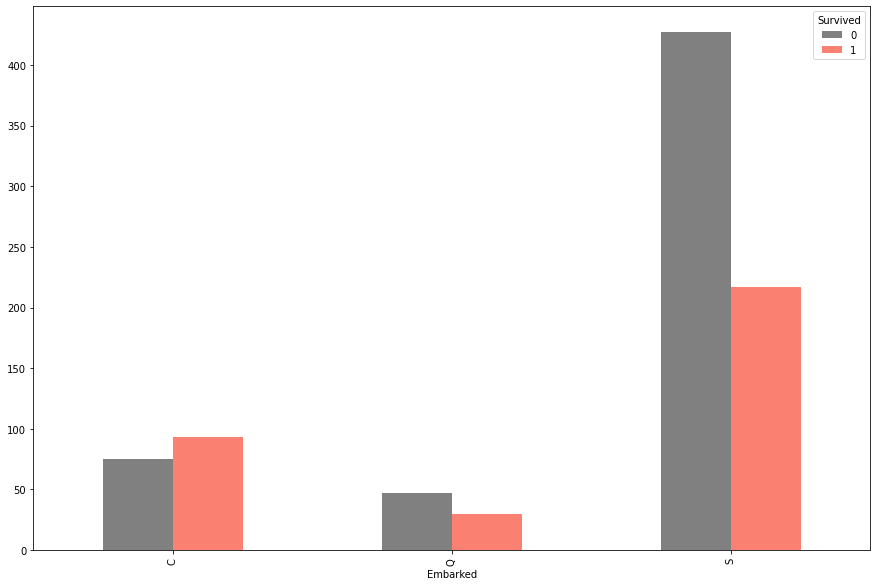

In [11]:
pd.crosstab(train_df.Embarked,
           train_df.Survived).plot(kind="bar",
                                  figsize=(15,10),
                                  color=["grey","salmon"]);

* Conclusion : C is the best one and after that Q and the worst one is S

In [12]:
#Handling the missing values
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
mean=train_df.Age.mean()
mean

29.69911764705882

In [14]:
std=train_df.Age.std()
std

14.526497332334042

In [15]:
randAge=np.random.randint(mean-std,mean+std,size=177)
randAge

array([41, 17, 40, 15, 26, 21, 15, 22, 22, 39, 31, 40, 39, 37, 32, 30, 24,
       35, 34, 39, 35, 43, 37, 26, 21, 28, 32, 24, 19, 21, 27, 23, 28, 33,
       18, 25, 31, 34, 29, 20, 38, 21, 23, 23, 28, 37, 33, 32, 42, 18, 29,
       29, 35, 32, 27, 39, 16, 15, 40, 32, 28, 30, 17, 36, 29, 42, 20, 38,
       40, 15, 17, 39, 32, 16, 20, 28, 38, 15, 32, 19, 21, 30, 38, 24, 34,
       19, 37, 21, 29, 17, 34, 31, 16, 25, 24, 39, 35, 22, 42, 34, 30, 19,
       20, 27, 38, 37, 31, 37, 25, 33, 33, 40, 35, 27, 36, 24, 37, 30, 39,
       21, 39, 34, 18, 24, 40, 37, 26, 24, 22, 26, 15, 30, 42, 42, 31, 39,
       36, 31, 20, 39, 28, 25, 32, 21, 36, 25, 20, 34, 43, 42, 19, 29, 21,
       21, 29, 38, 19, 24, 25, 22, 18, 16, 30, 17, 40, 42, 27, 31, 42, 38,
       23, 27, 25, 35, 26, 35, 39])

In [16]:
i=0
for age in range(len(train_df.Age)):
    if train_df["Age"].isna()[age]:
        train_df["Age"][age]=randAge[i]
        i+=1
        
train_df.isnull().sum()

<ipython-input-16-0d08feed1ef5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["Age"][age]=randAge[i]


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
drop_cols= ["PassengerId","Name","Ticket","Cabin"]
train_df.drop(drop_cols, axis=1, inplace=True)
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,39.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [18]:
train_df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [19]:
train_df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [20]:
train_df["Embarked"]=train_df["Embarked"].fillna("S")
train_df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [21]:
#Converting categorical variables to numeric
genders={"female":1,"male":0}
train_df["Sex"]=train_df["Sex"].map(genders)

ports={"S":0,"C":1,"Q":2}
train_df["Embarked"]=train_df["Embarked"].map(ports)

train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0
887,1,1,1,19.0,0,0,30.0000,0
888,0,3,1,39.0,1,2,23.4500,0
889,1,1,0,26.0,0,0,30.0000,1


## Good job! We handled our missing values well.
### Now our dataset has been prepared to be trained.
#### We will use:
* RandomForestClassifier
* LogisticRegression
* KNeighborsClassifier (KNN)
* DecisionTreeClassifier
* SupportVectorMachine (svm)

In [22]:
#preparing the models
models={"RandomForestClassifier":RandomForestClassifier(),
       "LogisticRegression":LogisticRegression(),
       "KNN":KNeighborsClassifier(),
       "DecisionTreeClassifier":tree.DecisionTreeClassifier(),
       "svm":svm.SVC()}

In [35]:
#Split data
X = train_df.drop("Survived", axis=1)
y = train_df["Survived"]

X_train , X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

np.random.seed(50)

#fitting the models and compare their metrics
scores={}
for name,model in models.items():
    clf=model.fit(X_train,y_train)
    scores[name]=clf.score(X_test,y_test)
    
scores

{'RandomForestClassifier': 0.8044692737430168,
 'LogisticRegression': 0.776536312849162,
 'KNN': 0.6871508379888268,
 'DecisionTreeClassifier': 0.8044692737430168,
 'svm': 0.6815642458100558}

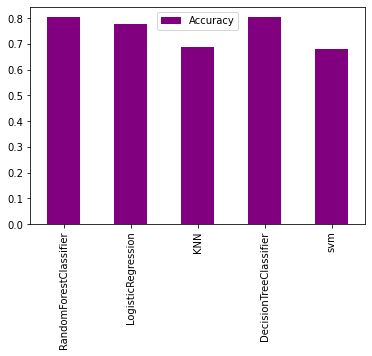

In [36]:
model_scores = pd.DataFrame(scores, index=["Accuracy"])
model_scores.T.plot.bar(color="purple");

In [242]:
### Tuning Hyperprameters : RandomForestClassifier

rfc_grid={"n_estimators":np.arange(10,2000,10),
         "max_depth":[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,10,2),
         "min_samples_split":np.arange(2,20,2),
         "bootstrap":[True,False]}

rfc_mdl=RandomizedSearchCV(estimator=RandomForestClassifier(),
                          param_distributions=rfc_grid,
                          n_iter=30,
                          cv=5,
                          verbose=True)

rfc_mdl.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  8.6min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=30,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'min_samples_leaf': array([1, 3, 5, 7, 9]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([  10,   20,   30,   40,   50,   60,   70,   80,   90,  100,  110,
        120,  130,  140,  150,  160,  170,  180,  190,  200,  21...
       1330, 1340, 1350, 1360, 1370, 1380, 1390, 1400, 1410, 1420, 1430,
       1440, 1450, 1460, 1470, 1480, 1490, 1500, 1510, 1520, 1530, 1540,
       1550, 1560, 1570, 1580, 1590, 1600, 1610, 1620, 1630, 1640, 1650,
       1660, 1670, 1680, 1690, 1700, 1710, 1720, 1730, 1740, 1750, 1760,
       1770, 1780, 1790, 

In [244]:
rfc_mdl.best_params_

{'n_estimators': 450,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_depth': 40,
 'bootstrap': True}

In [247]:
rfc_mdl.score(X_test,y_test)

0.8603351955307262

In [248]:
import pickle
pickle.dump(rfc_mdl, open("RandomForestClassifier_Titanic_RS_86.pkl","wb"))

In [37]:
test_df=pd.read_csv("test.csv")
PassengerId=np.array(test_df["PassengerId"])
test_df.drop(drop_cols,axis=1,inplace=True)
genders={"female":1,"male":0}
test_df["Sex"]=test_df["Sex"].map(genders)

ports={"S":0,"C":1,"Q":2}
test_df["Embarked"]=test_df["Embarked"].map(ports)

mean=test_df["Age"].mean()
std=test_df["Age"].std()

randAge=np.random.randint(mean-std, mean+std, size=86)
i=0
for age in range(len(test_df.Age)):
    if test_df["Age"].isna()[age]:
        test_df["Age"][age]=randAge[i]
        i+=1
        
test_df["Fare"]=test_df["Fare"].fillna(7.7500)
        
test_pred=rfc_mdl.predict(test_df)
data={"PassengerId":PassengerId,"Survived":test_pred}
pd.DataFrame(data).to_csv("titanic_prediction3.csv")

<ipython-input-37-1f3c1c237f27>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["Age"][age]=randAge[i]


In [ ]:
test_pred=rfc_mdl.predict(test_df)
data={"PassengerId":PassengerId,"Survived":test_pred}
pd.DataFrame(data).to_csv("titanic_prediction3.csv")

In [42]:
import pickle
pickle.dump(loaded_rfc_mdl, open("RandomForestClassifier_Titanic_RS_89.pkl","wb"))

In [43]:
#load model
import pickle
loaded_rfc_mdl = pickle.load(open("RandomForestClassifier_Titanic_RS_89.pkl", 'rb'))
loaded_rfc_mdl.score(X_test,y_test)

0.8994413407821229

In [121]:
test_df=pd.read_csv("test.csv")
PassengerId=np.array(test_df["PassengerId"])
test_df.drop(drop_cols,axis=1,inplace=True)
genders={"female":1,"male":0}
test_df["Sex"]=test_df["Sex"].map(genders)

ports={"S":0,"C":1,"Q":2}
test_df["Embarked"]=test_df["Embarked"].map(ports)

mean=test_df["Age"].mean()
std=test_df["Age"].std()

randAge=np.random.randint(mean-std, mean+std, size=86)
i=0
for age in range(len(test_df.Age)):
    if test_df["Age"].isna()[age]:
        test_df["Age"][age]=randAge[i]
        i+=1
        
test_df["Fare"]=test_df["Fare"].fillna(7.7500)
        
test_pred=loaded_rfc_mdl.predict(test_df)
data={"PassengerId":PassengerId,"Survived":test_pred}
pd.DataFrame(data).to_csv("titanic_prediction.csv")

<ipython-input-121-53ff86cd1dbd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["Age"][age]=randAge[i]
